In [ ]:
import torch
import torch.optim as optim
import numpy as np

torch.manual_seed(42)

dim_hidden = 6
dim_input = 1
dim_output = 1

Wrec = torch.randn(dim_hidden, dim_hidden, requires_grad=True)
Win = torch.randn(dim_input, dim_hidden, requires_grad=True)
Wout = torch.randn(dim_hidden, dim_output, requires_grad=True)

def recurrent_unit(x, h_prev, Wrec, Win):
    """
    INPUT
    x - a (minibatch_size, 1) tensor
    h_prev - a tensor of shape (minibatch_size, dim_hidden)

    RETURN
    h_next - a tensor of shape (minibatch_size, dim_hidden)
    """

    h_next = torch.relu(torch.matmul(h_prev, Wrec.T) + x * Win)
    return h_next
    # YOUR CODE HERE
    raise NotImplementedError


learning_rate = 0.001
num_epochs = 100000
minibatch_size = 2**8

optimizer = optim.SGD([Wrec, Win, Wout], lr=learning_rate)

loss_history = []

seq_length = 8

def forward(seqs,Wrec, Win, Wout):
    """
    INPUT
    seqs - a (minibatch_size, seq_length, dim_input) tensor

    RETURN
    yhat - a (minibatch_size, ) tensor
    """
    h = torch.zeros(seqs.shape[0], dim_hidden)

    for x in seqs.transpose(0, 1):
        h = recurrent_unit(x, h, Wrec,Win)
    yhat = torch.sum(Wout.T * h, dim=1)

    return yhat
    # YOUR CODE HERE
    # hint: Luke, use the `for x in seqs.transpose(0, 1):...`
    raise NotImplementedError




for epoch in range(num_epochs):
    seqs = torch.tensor(np.random.randn(minibatch_size, seq_length, dim_input), dtype=torch.float32)
    max_seqs = torch.max(seqs, dim=1).values.squeeze()

    yhat = forward(seqs,Wrec, Win,Wout)
    loss = torch.mean(torch.abs(yhat - max_seqs))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())
    if epoch % 10000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# expected output (not exact)
#
# Epoch 0, Loss: 18.884214401245117
# Epoch 10000, Loss: 0.31916582584381104
# Epoch 20000, Loss: 0.20718279480934143


Epoch 0, Loss: 22.456886291503906
Epoch 10000, Loss: 0.2770678997039795
Epoch 20000, Loss: 0.21754859387874603
Epoch 30000, Loss: 0.13409927487373352
Epoch 40000, Loss: 0.09131954610347748
Epoch 50000, Loss: 0.07271915674209595
Epoch 60000, Loss: 0.04620184749364853
Epoch 70000, Loss: 0.03746432438492775
Epoch 80000, Loss: 0.028539858758449554
Epoch 90000, Loss: 0.025621697306632996


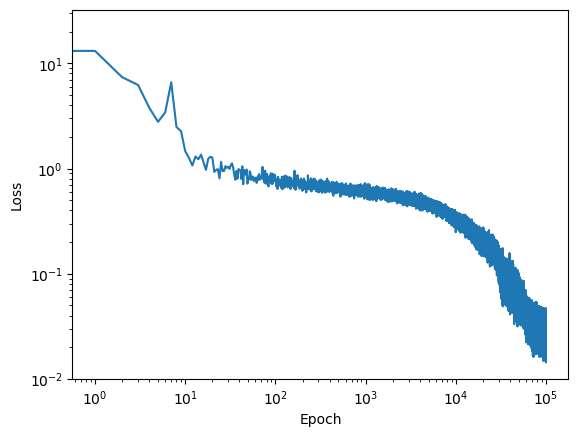

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
seq_length = 5
minibatch_size_test = 32
xs = torch.tensor(np.random.randn(minibatch_size_test, seq_length, dim_input), dtype=torch.float32)
max_xs = torch.max(xs, dim=1).values.squeeze()  # Shape: (minibatch_size,)

max_actual = np.round(max_xs.detach().numpy(),2)
max_actual

array([-0.07,  0.81,  1.48,  1.43,  1.41, -0.29,  1.73,  1.26,  0.43,
        0.57,  0.49,  2.19,  0.37,  2.13,  1.64,  1.23,  0.39,  1.98,
        1.87,  1.74,  1.09,  0.74,  0.62,  0.38,  1.02,  0.57,  0.77,
        1.56,  1.98,  0.18,  0.74,  1.55], dtype=float32)

In [ ]:
max_estimate = np.round(forward(xs,Wrec, Win,Wout).detach().numpy(),2)
max_estimate

array([0.  , 0.81, 1.51, 1.46, 1.4 , 0.  , 1.75, 1.29, 0.43, 0.61, 0.49,
       2.18, 0.28, 1.6 , 1.65, 1.26, 0.39, 1.91, 2.15, 1.75, 1.09, 0.81,
       0.62, 0.38, 1.04, 0.59, 0.77, 1.56, 1.6 , 0.13, 0.74, 1.57],
      dtype=float32)